In [87]:
# FS plots of stripe imagery and its Fourier Transforms, 2015-10-20.

%matplotlib notebook

import numpy as np

from scipy import misc
from scipy import ndimage
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, fftfreq

<IPython.core.display.Javascript object>


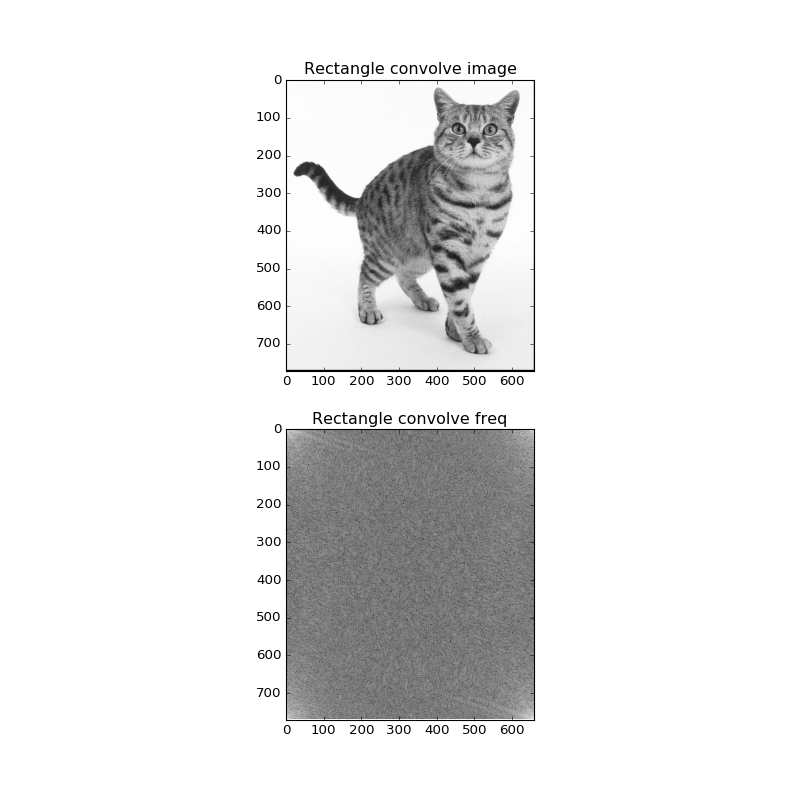

/Users/yinghanxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Javascript object>


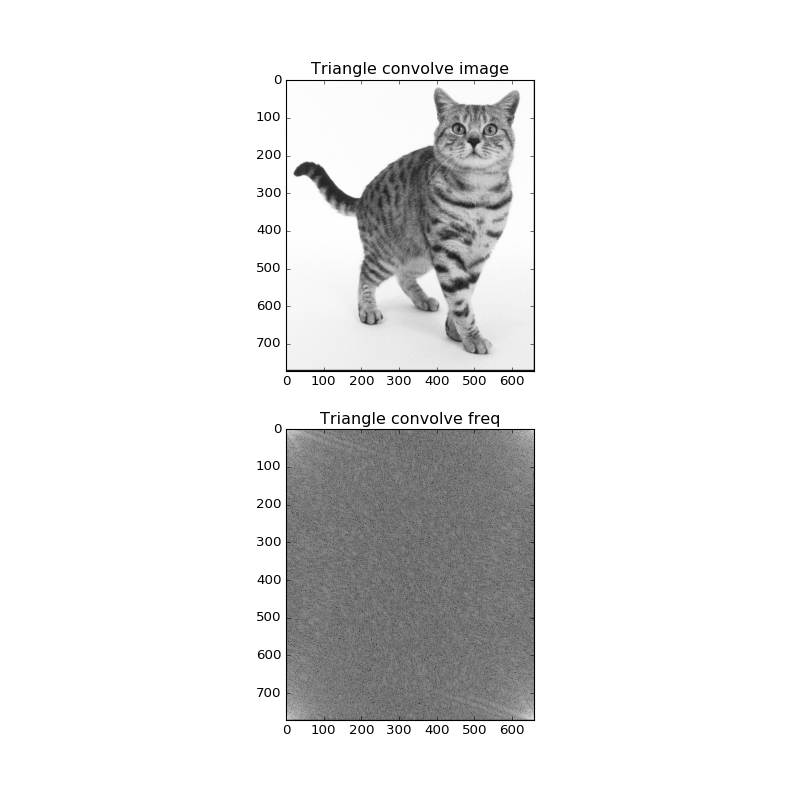

/Users/yinghanxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Javascript object>


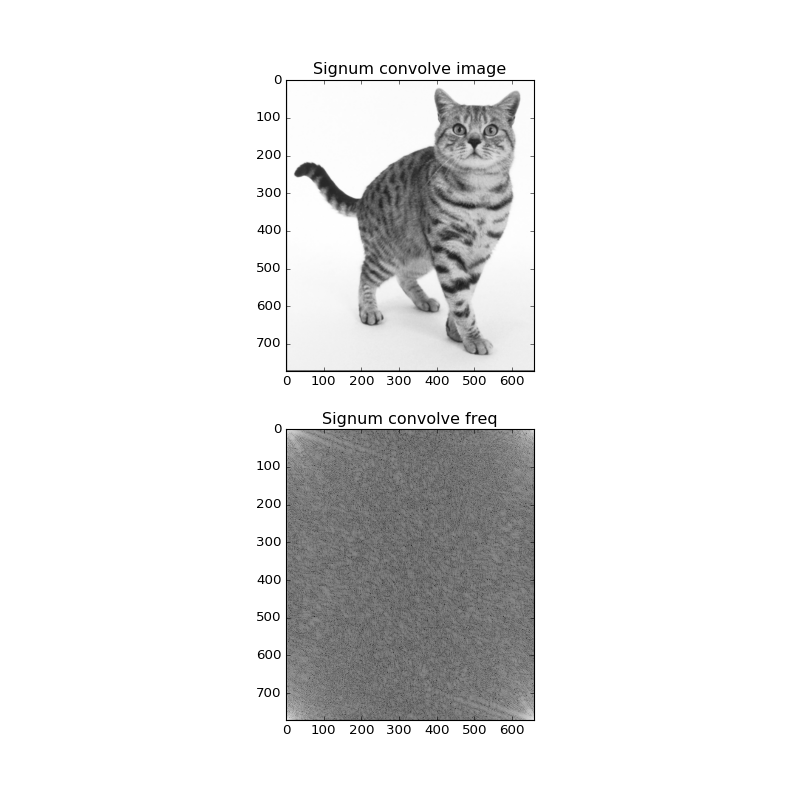

/Users/yinghanxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log


In [96]:
#create the signal
def createSignal(func,time_array):
    i=0
    result = [0.0]*len(time_array)
    for t in time_array:
        result[i]=func(t)
        i=i+1
    return result
 
#rectangle function 
def rect(t):
    if np.abs(t)>0.5:
        return 0
    elif np.abs(t)==0.5:
         return 0.5
    elif np.abs(t)<0.5:
        return 1

#signum function
def signum(t):
    return np.sign(t)

#triangle function
def triangle(t):
    if np.abs(t) < 1:
        return 1-np.abs(t)
    else:
        return 0
    
#calculate the 2D signal and the power
def power(signal1D):
    signal2D =np.empty([len(signal1D),len(signal1D)])
    for x in range(0,len(signal1D)):
        for y in range(0,len(signal1D)):
            signal2D[x][y] =signal1D[x]*signal1D[y]
    fft=np.fft.fftshift(np.log(fft2(signal2D)),axes=(0,1))
    return signal2D,fft
            
#convolution
def convolve(img,kernel):
    fft = fft2(img)
    space = signal.convolve2d(img,kernel)
    freq = signal.convolve2d(fft,kernel)
    return space,freq

#plot
def plot(conv_img,conv_freq,name):
    fig= plt.figure(figsize=(10,10))
    
    space_subfig = fig.add_subplot(2,1,1)
    space_subfig.set_title(name + " convolve image")
    space_subfig.imshow(np.abs(conv_img),cmap=cm.Greys_r)
    
    freq_subfig = fig.add_subplot(2,1,2)
    freq_subfig.set_title(name + " convolve freq")
    freq_subfig.imshow(np.log(np.abs(conv_freq)),cmap=cm.Greys_r)
    
    fig.show()

img = mpimg.imread('StripedCat1.png') #reading the image

#creating the space sampling
space_plot=1
space_density = 5 
space_array= np.linspace(0,space_plot,space_density*space_plot)

#Rectangle signal
rect_array = createSignal(rect,space_array)
rect_signal2D,rect_fft = power(rect_array)
rect_conv_img,rect_conv_freq = convolve(img,rect_signal2D)    
plot(rect_conv_img,rect_conv_freq,"Rectangle")

#triangle signal
triangle_array = createSignal(triangle, space_array)
triangle_signal2D, tirangle_fft = power(triangle_array)
triangle_conv_img, triangle_conv_freq = convolve(img, triangle_signal2D)
plot(triangle_conv_img, triangle_conv_freq, "Triangle")

#Signum signal
signum_array = createSignal(signum, space_array)
signum_signal2D, signum_fft = power(signum_array)
signum_conv_img, signum_conv_freq = convolve(img, signum_signal2D)
plot(signum_conv_img, signum_conv_freq, "Signum")

